In [1]:
#links

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#https://medium.com/@ya.aman.ay/classifier-visualization-playground-with-python-4aecced663f0
#https://towardsdatascience.com/hands-on-guide-to-plotting-a-decision-surface-for-ml-in-python-149710ee2a0e


#imports

import numpy as np

import os
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn import ensemble

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./chips.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       118 non-null    float64
 1   y       118 non-null    float64
 2   class   118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


[Text(0.6454081632653061, 0.9545454545454546, 'X[0] <= 0.751\ngini = 0.5\nsamples = 118\nvalue = [60, 58]'),
 Text(0.6045918367346939, 0.8636363636363636, 'X[1] <= 0.703\ngini = 0.496\nsamples = 106\nvalue = [48, 58]'),
 Text(0.29081632653061223, 0.7727272727272727, 'X[0] <= -0.646\ngini = 0.463\nsamples = 85\nvalue = [31, 54]'),
 Text(0.25, 0.6818181818181818, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.33163265306122447, 0.6818181818181818, 'X[1] <= -0.572\ngini = 0.419\nsamples = 77\nvalue = [23, 54]'),
 Text(0.08163265306122448, 0.5909090909090909, 'X[0] <= 0.175\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.04081632653061224, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.12244897959183673, 0.5, 'X[0] <= 0.244\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.08163265306122448, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16326530612244897, 0.4090909090909091, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.58163265306122

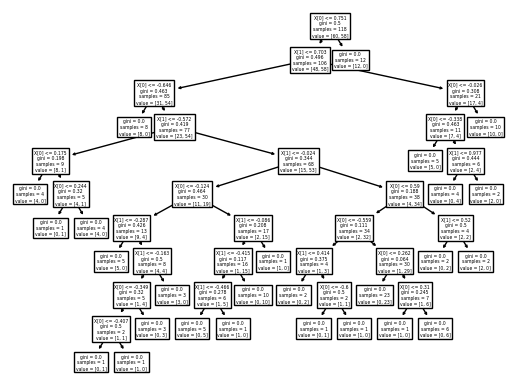

In [4]:
clf = tree.DecisionTreeClassifier()
X = list(map(list, zip(df.x.array, df.y.array)))
y = df['class']
clf = clf.fit(X, y)
tree.plot_tree(clf)

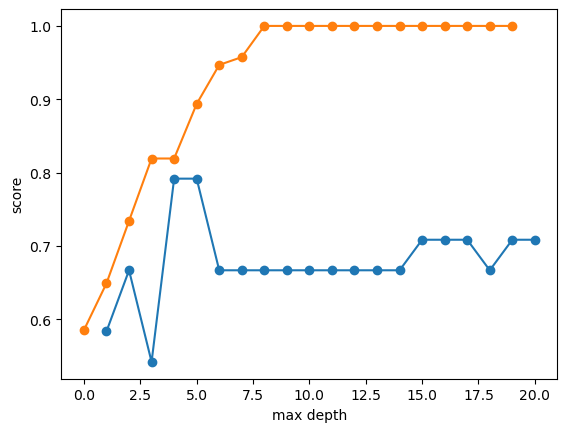

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
auc_array1 = np.zeros(20)
auc_array2 = np.zeros(20)
for i in range(20):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf = clf.fit(X_train, y_train)
    auc_array1[i] =clf.score(X_test, y_test)
    auc_array2[i] =clf.score(X_train, y_train)
plt.plot(np.linspace(1, 20, 20) ,auc_array1, 'o-', auc_array2, 'o-')
plt.ylabel('score')
plt.xlabel('max depth')
plt.show()

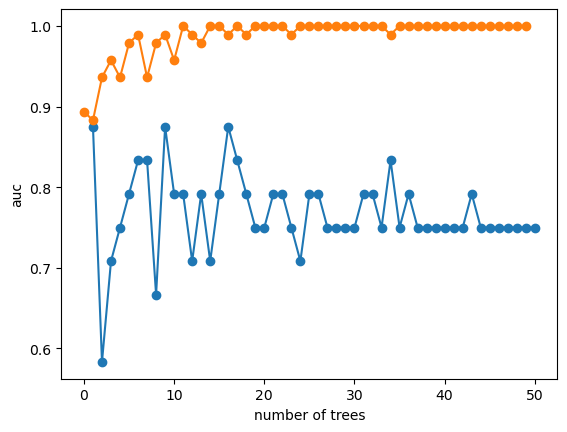

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
auc_array1 = np.zeros(50)
auc_array2 = np.zeros(50)
for i in range(50):
    clf = ensemble.RandomForestClassifier(n_estimators = i+1)
    clf = clf.fit(X_train, y_train)
    auc_array1[i] =clf.score(X_test, y_test)
    auc_array2[i] =clf.score(X_train, y_train)
plt.plot(np.linspace(1, 50, 50) ,auc_array1, 'o-', auc_array2, 'o-')
plt.ylabel('auc')
plt.xlabel('number of trees')
plt.show()

In [7]:
def gradient_plot(X_train, X_test, y_train, y_test, clf):
    X_test_plt = list(map(list, zip(*X_test)))
    X_train_plt = list(map(list, zip(*X_train)))
    min1, max1 = min(X_train_plt[0]) - 0.3, max(X_train_plt[0])+0.3
    min2, max2 = min(X_train_plt[1]) - 0.3, max(X_train_plt[1])+0.3
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    pred = clf.predict(grid)
    zz = pred.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='Paired')
    plt.scatter(X_train_plt[0], X_train_plt[1], c=y_train.apply(lambda x: 'blue' if x else 'red'), marker='^')
    plt.scatter(X_test_plt[0], X_test_plt[1],  c=y_test.apply(lambda x: 'blue' if x else 'red'))
    plt.show()

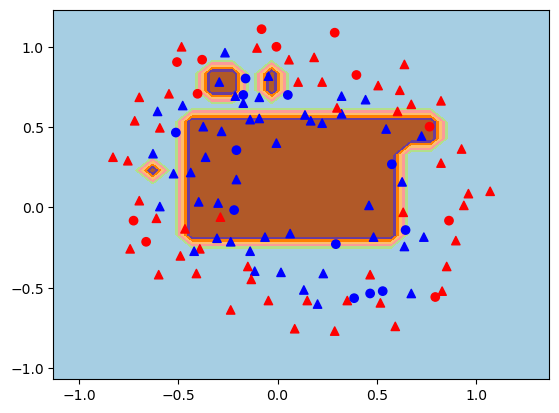

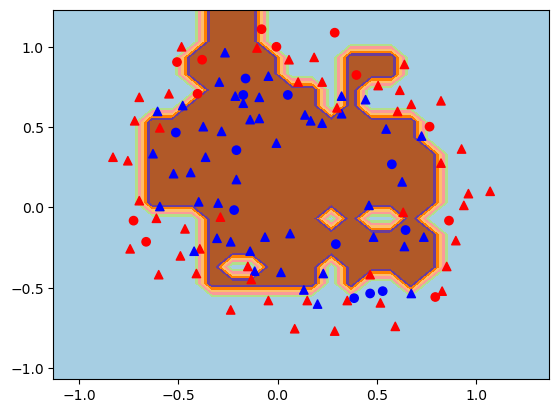

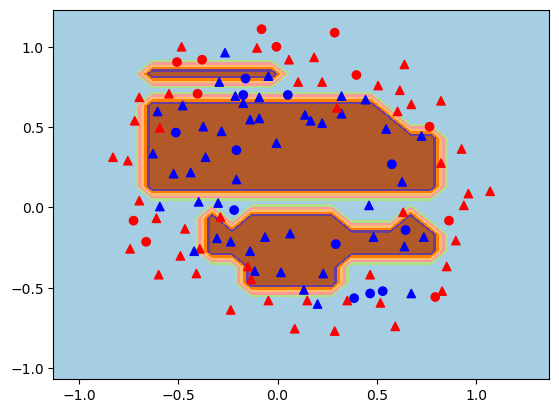

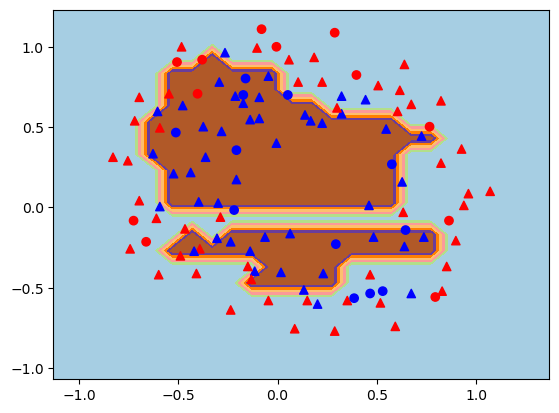

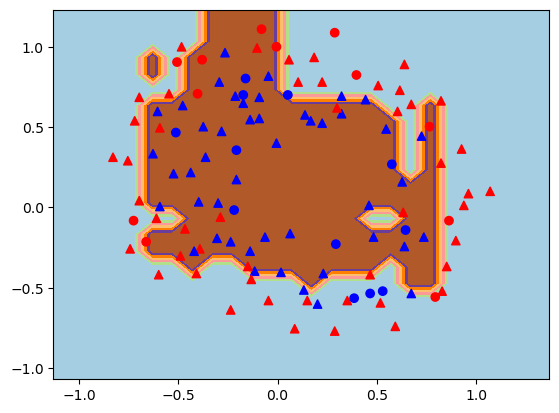

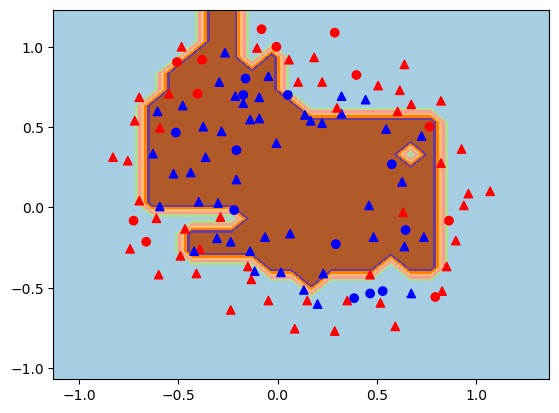

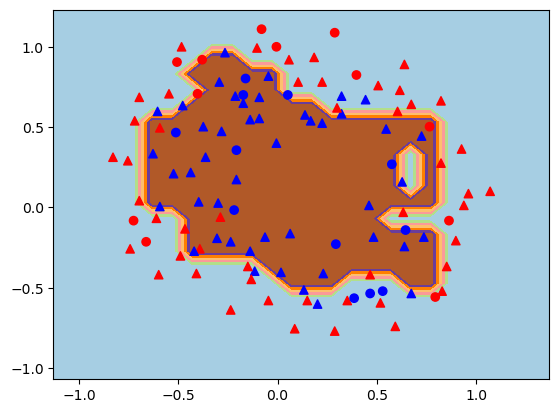

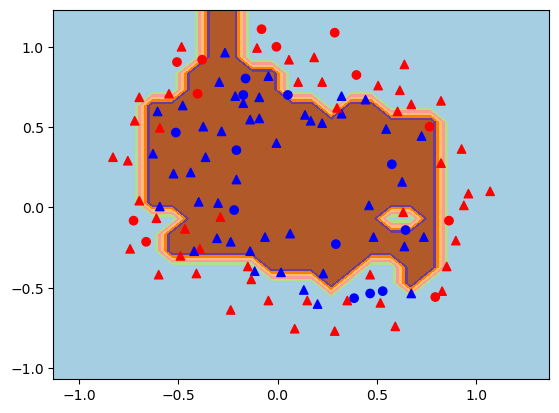

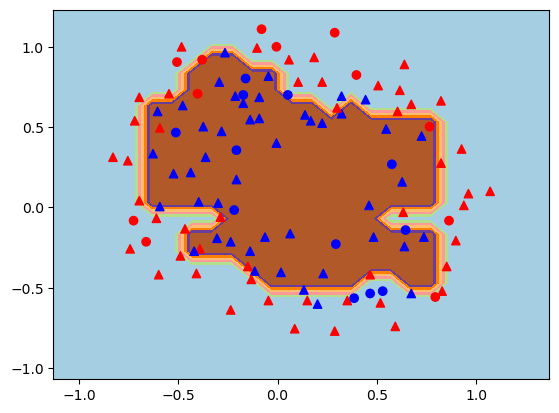

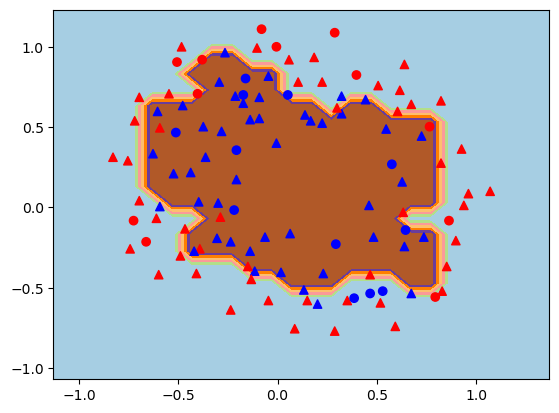

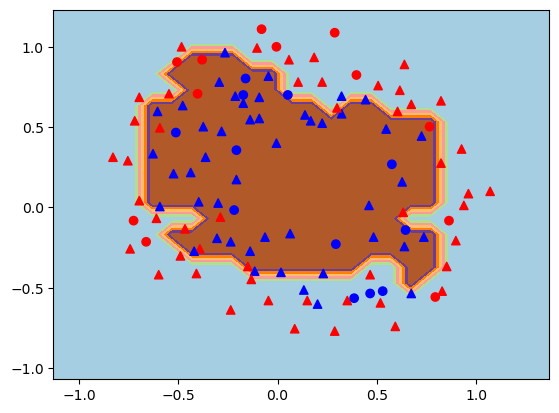

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]:
    clf = ensemble.RandomForestClassifier(n_estimators = i+1)
    clf = clf.fit(X_train, y_train)
    gradient_plot(X_train, X_test, y_train, y_test, clf)


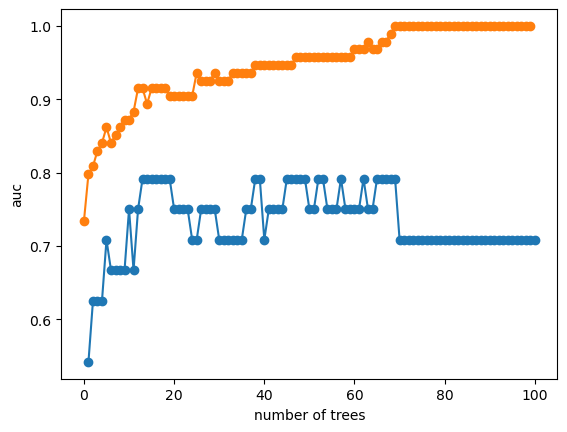

In [9]:
auc_array1 = np.zeros(100)
auc_array2 = np.zeros(100)
for i in range(100):
    clf = ensemble.GradientBoostingClassifier(n_estimators = i+1)
    clf = clf.fit(X_train, y_train)
    auc_array1[i] =clf.score(X_test, y_test)
    auc_array2[i] =clf.score(X_train, y_train)
plt.plot(np.linspace(1, 100, 100) ,auc_array1, 'o-', auc_array2, 'o-')
plt.ylabel('auc')
plt.xlabel('number of trees')
plt.show()

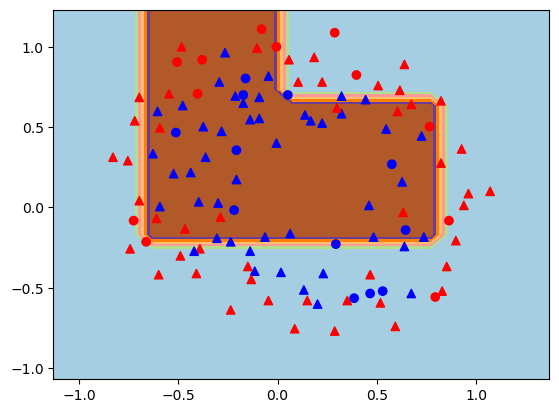

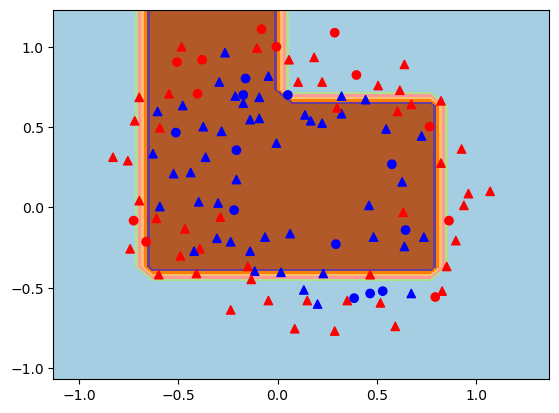

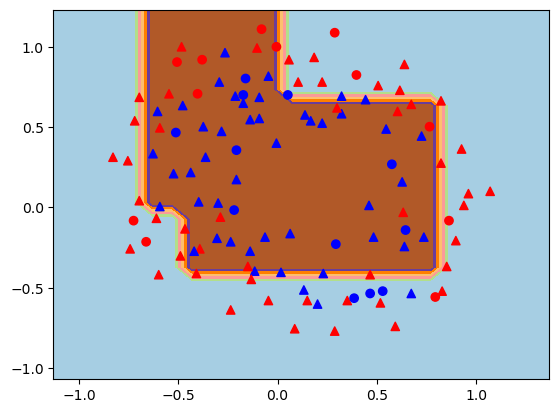

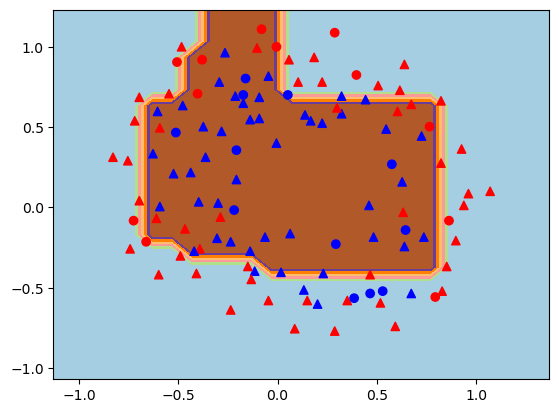

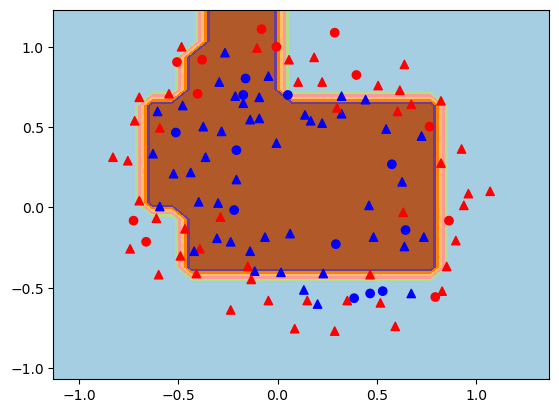

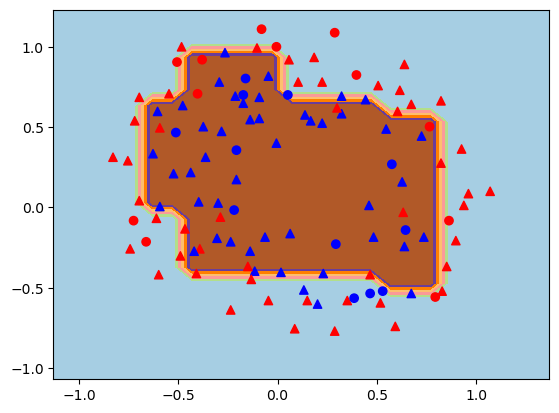

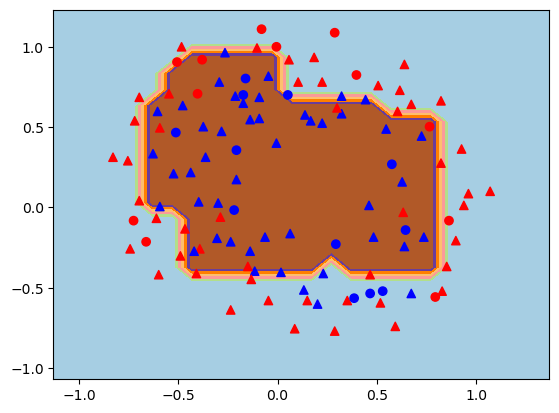

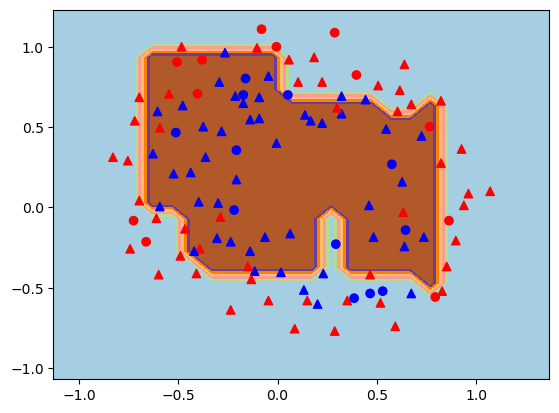

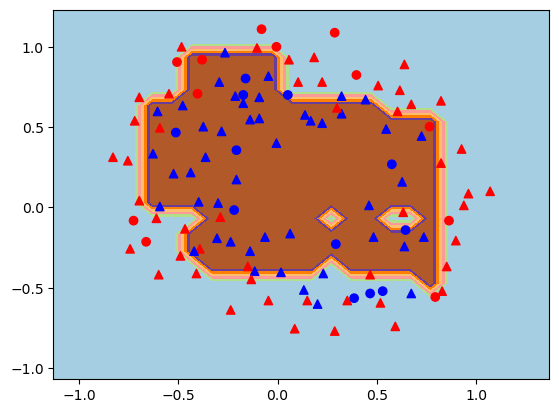

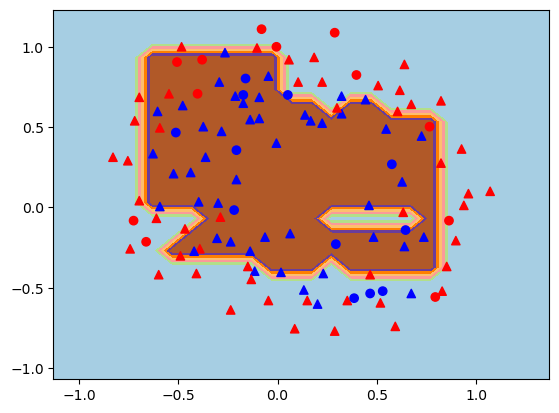

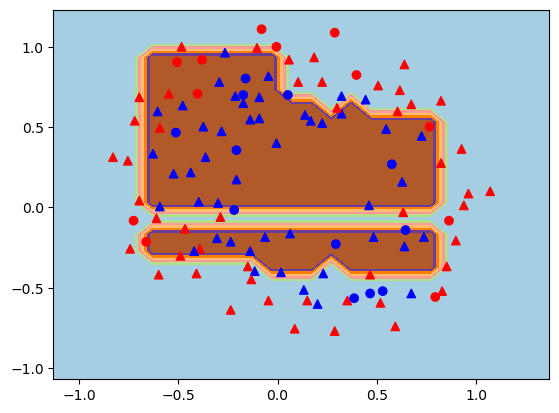

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]:
    clf = ensemble.GradientBoostingClassifier(n_estimators = i+1)
    clf = clf.fit(X_train, y_train)
    gradient_plot(X_train, X_test, y_train, y_test, clf)
